In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # for ignoring warning
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_excel(r"C:\Users\Arpit\Desktop\Courses\END TO END DA Projects\DATA ANALYST PROJECT - Vehicle Insurace Praud Detection\fraud_oracle.csv")

In [401]:
df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [402]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [403]:
df.shape

(15420, 33)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [405]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [406]:
# Create AccidentDate column
df['AccidentDate'] = pd.to_datetime(df['Month'] + ' ' + df['WeekOfMonth'].astype(str) + ', ' + df['Year'].astype(str))

# Create ClaimDate column
df['ClaimDate'] = pd.to_datetime(df['MonthClaimed'] + ' ' + df['WeekOfMonthClaimed'].astype(str) + ', ' + df['Year'].astype(str))


ParserError: month must be in 1..12: 0 1, 1994 present at position 60

### Checking which column has wrong value
----------------------

In [407]:
print("Distinct values of Month:", df['Month'].unique())

print("Distinct values of WeekOfMonth:", df['WeekOfMonth'].unique())

print("Distinct values of DayOfWeek:", df['DayOfWeek'].unique())

print("Distinct values of Year:", df['Year'].unique())

print("Distinct values of MonthClaimed:", df['MonthClaimed'].unique())

print("Distinct values of WeekOfMonthClaimed:", df['WeekOfMonthClaimed'].unique())

print("Distinct values of DayOfWeekClaimed:", df['DayOfWeekClaimed'].unique())

Distinct values of Month: ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
Distinct values of WeekOfMonth: [5 3 2 4 1]
Distinct values of DayOfWeek: ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Distinct values of Year: [1994 1995 1996]
Distinct values of MonthClaimed: ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
Distinct values of WeekOfMonthClaimed: [1 4 2 3 5]
Distinct values of DayOfWeekClaimed: ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']


### Now checking which rows have 0 date and month claim
-------------------------------------

In [408]:
count_both_zero = df[(df['MonthClaimed'] == '0') | (df['DayOfWeekClaimed'] == '0')].shape[0]

print("Number of rows where either MonthClaimed or DayOfWeekClaimed is '0':", count_both_zero)


Number of rows where either MonthClaimed or DayOfWeekClaimed is '0': 1


In [409]:
df = df[(df['MonthClaimed'] != '0') & (df['DayOfWeekClaimed'] != '0')]


In [410]:
df.shape

(15419, 34)

In [411]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AccidentDate
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,1994-12-05
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,1994-01-03
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,1994-10-05
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,1994-06-02
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,1994-01-05


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Month                 15419 non-null  object        
 1   WeekOfMonth           15419 non-null  int64         
 2   DayOfWeek             15419 non-null  object        
 3   Make                  15419 non-null  object        
 4   AccidentArea          15419 non-null  object        
 5   DayOfWeekClaimed      15419 non-null  object        
 6   MonthClaimed          15419 non-null  object        
 7   WeekOfMonthClaimed    15419 non-null  int64         
 8   Sex                   15419 non-null  object        
 9   MaritalStatus         15419 non-null  object        
 10  Age                   15419 non-null  int64         
 11  Fault                 15419 non-null  object        
 12  PolicyType            15419 non-null  object        
 13  VehicleCategory 

In [413]:
df['Index Number'] = range(1, len(df) + 1)

df.head(5)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AccidentDate,Index Number
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,No,No,External,none,1 year,3 to 4,1994,Liability,1994-12-05,1
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,Yes,No,External,none,no change,1 vehicle,1994,Collision,1994-01-03,2
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,No,No,External,none,no change,1 vehicle,1994,Collision,1994-10-05,3
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,1994-06-02,4
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,No,No,External,none,no change,1 vehicle,1994,Collision,1994-01-05,5


### 1st column should be serial number
-------------------

In [414]:
df.drop(columns=['Index Number'], inplace=True)

In [415]:
df.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AccidentDate
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,1994-12-05
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,1994-01-03
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,1994-10-05
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,1994-06-02
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,1994-01-05


In [416]:
df.insert(0, 'Index Number', range(1, len(df) + 1))

df.head()


,Index Number,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AccidentDate
0,1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,1994-12-05
1,2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,1994-01-03
2,3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,1994-10-05
3,4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,1994-06-02
4,5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,1994-01-05


In [417]:
df.head(5)

,Index Number,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AccidentDate
0,1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,1994-12-05
1,2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,1994-01-03
2,3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,1994-10-05
3,4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,1994-06-02
4,5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,1994-01-05


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Index Number          15419 non-null  int64         
 1   Month                 15419 non-null  object        
 2   WeekOfMonth           15419 non-null  int64         
 3   DayOfWeek             15419 non-null  object        
 4   Make                  15419 non-null  object        
 5   AccidentArea          15419 non-null  object        
 6   DayOfWeekClaimed      15419 non-null  object        
 7   MonthClaimed          15419 non-null  object        
 8   WeekOfMonthClaimed    15419 non-null  int64         
 9   Sex                   15419 non-null  object        
 10  MaritalStatus         15419 non-null  object        
 11  Age                   15419 non-null  int64         
 12  Fault                 15419 non-null  object        
 13  PolicyType      

In [419]:
df['AccidentDate'] = pd.to_datetime(df['Month'] + ' ' + df['WeekOfMonth'].astype(str) + ', ' + df['Year'].astype(str))

df['ClaimDate'] = pd.to_datetime(df['MonthClaimed'] + ' ' + df['WeekOfMonthClaimed'].astype(str) + ', ' + df['Year'].astype(str))

df.head(5)



,Index Number,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,AccidentDate,ClaimDate
0,1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,...,No,No,External,none,1 year,3 to 4,1994,Liability,1994-12-05,1994-01-01
1,2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,...,Yes,No,External,none,no change,1 vehicle,1994,Collision,1994-01-03,1994-01-04
2,3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,...,No,No,External,none,no change,1 vehicle,1994,Collision,1994-10-05,1994-11-02
3,4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,...,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,1994-06-02,1994-07-01
4,5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,...,No,No,External,none,no change,1 vehicle,1994,Collision,1994-01-05,1994-02-02


In [420]:
df.columns

Index(['Index Number', 'Month', 'WeekOfMonth', 'DayOfWeek', 'Make',
       'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault',
       'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'AccidentDate', 'ClaimDate'],
      dtype='object')

### Removing Columns like

1. 'Month'
2. 'WeekOfMonth'
3. 'DayOfWeek'
4. 'DayOfWeekClaimed'
5. 'MonthClaimed'
6. 'WeekOfMonthClaimed'
7. 'Age'
8. 'PolicyNumber'
9. 'RepNumber'
10. 'Deductible'
11. 'NumberOfSuppliments'
12. 'AddressChange_Claim'
13. 'Year'
14. 'PolicyType'

15. 'MaritalStatus'
16. 'VehicleCategory'
17. 'AgeOfPolicyHolder'
18. 'Sex'



In [421]:
df.drop(columns=['Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Age','PolicyNumber','RepNumber','Deductible','NumberOfSuppliments','AddressChange_Claim','Year','PolicyType','Sex','AgeOfPolicyHolder','VehicleCategory','MaritalStatus'], inplace=True)

In [422]:
df.shape

(15419, 18)

In [423]:
df.head(5)

,Index Number,Make,AccidentArea,Fault,VehiclePrice,FraudFound_P,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfCars,BasePolicy,AccidentDate,ClaimDate
0,1,Honda,Urban,Policy Holder,more than 69000,0,1,more than 30,more than 30,none,3 years,No,No,External,3 to 4,Liability,1994-12-05,1994-01-01
1,2,Honda,Urban,Policy Holder,more than 69000,0,4,more than 30,more than 30,none,6 years,Yes,No,External,1 vehicle,Collision,1994-01-03,1994-01-04
2,3,Honda,Urban,Policy Holder,more than 69000,0,3,more than 30,more than 30,1,7 years,No,No,External,1 vehicle,Collision,1994-10-05,1994-11-02
3,4,Toyota,Rural,Third Party,20000 to 29000,0,2,more than 30,more than 30,1,more than 7,Yes,No,External,1 vehicle,Liability,1994-06-02,1994-07-01
4,5,Honda,Urban,Third Party,more than 69000,0,1,more than 30,more than 30,none,5 years,No,No,External,1 vehicle,Collision,1994-01-05,1994-02-02


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Index Number          15419 non-null  int64         
 1   Make                  15419 non-null  object        
 2   AccidentArea          15419 non-null  object        
 3   Fault                 15419 non-null  object        
 4   VehiclePrice          15419 non-null  object        
 5   FraudFound_P          15419 non-null  int64         
 6   DriverRating          15419 non-null  int64         
 7   Days_Policy_Accident  15419 non-null  object        
 8   Days_Policy_Claim     15419 non-null  object        
 9   PastNumberOfClaims    15419 non-null  object        
 10  AgeOfVehicle          15419 non-null  object        
 11  PoliceReportFiled     15419 non-null  object        
 12  WitnessPresent        15419 non-null  object        
 13  AgentType       

### Now converting these Dataframe into excel sheet
---------------

In [425]:
with pd.ExcelWriter(r"C:\Users\Arpit\Desktop\Courses\END TO END DA Projects\DATA ANALYST PROJECT - Vehicle Insurace Praud Detection\Vehicle_Insurace_Fraud.xlsx", engine='xlsxwriter') as writer:
    # Writing each dataframe to a separate sheet
    df.to_excel(writer, sheet_name='VehicleInsuraceFraudData', index=False)


In [426]:
df.shape

(15419, 18)

In [427]:
# Filter rows where ClaimDate is before AccidentDate
rows_with_claim_before_accident = df[df['ClaimDate'] < df['AccidentDate']]

rows_with_claim_before_accident


,Index Number,Make,AccidentArea,Fault,VehiclePrice,FraudFound_P,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfCars,BasePolicy,AccidentDate,ClaimDate
0,1,Honda,Urban,Policy Holder,more than 69000,0,1,more than 30,more than 30,none,3 years,No,No,External,3 to 4,Liability,1994-12-05,1994-01-01
7,8,Honda,Urban,Policy Holder,more than 69000,0,4,more than 30,more than 30,1,new,No,No,External,1 vehicle,Collision,1994-11-01,1994-03-04
39,40,Toyota,Urban,Policy Holder,20000 to 29000,0,3,more than 30,more than 30,none,7 years,No,No,External,1 vehicle,Collision,1994-11-04,1994-01-01
52,53,Honda,Rural,Policy Holder,more than 69000,1,4,more than 30,more than 30,none,4 years,No,No,External,1 vehicle,Collision,1994-07-03,1994-01-04
61,62,Pontiac,Urban,Policy Holder,40000 to 59000,0,4,more than 30,more than 30,none,more than 7,No,No,External,1 vehicle,Collision,1994-09-02,1994-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15382,15382,Mazda,Urban,Policy Holder,30000 to 39000,0,4,more than 30,more than 30,2 to 4,5 years,No,No,External,1 vehicle,All Perils,1996-12-01,1996-01-01
15383,15383,Honda,Urban,Policy Holder,20000 to 29000,0,1,more than 30,more than 30,more than 4,7 years,No,No,External,1 vehicle,Liability,1996-12-04,1996-01-01
15384,15384,Chevrolet,Urban,Third Party,more than 69000,0,3,more than 30,more than 30,none,7 years,No,No,External,1 vehicle,Liability,1996-12-04,1996-01-01
15385,15385,Pontiac,Urban,Policy Holder,20000 to 29000,0,3,more than 30,more than 30,1,5 years,No,No,External,1 vehicle,All Perils,1996-12-04,1996-01-03


### Around 500 entries should be deleted as Date of claim is before Date of Accident
_________________

In [428]:
remove_rows = df[df['ClaimDate'] < df['AccidentDate']].index

df.drop(remove_rows,inplace=True)

In [429]:
df.shape

(14888, 18)

In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14888 entries, 1 to 15419
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Index Number          14888 non-null  int64         
 1   Make                  14888 non-null  object        
 2   AccidentArea          14888 non-null  object        
 3   Fault                 14888 non-null  object        
 4   VehiclePrice          14888 non-null  object        
 5   FraudFound_P          14888 non-null  int64         
 6   DriverRating          14888 non-null  int64         
 7   Days_Policy_Accident  14888 non-null  object        
 8   Days_Policy_Claim     14888 non-null  object        
 9   PastNumberOfClaims    14888 non-null  object        
 10  AgeOfVehicle          14888 non-null  object        
 11  PoliceReportFiled     14888 non-null  object        
 12  WitnessPresent        14888 non-null  object        
 13  AgentType       

In [431]:
df.columns

Index(['Index Number', 'Make', 'AccidentArea', 'Fault', 'VehiclePrice',
       'FraudFound_P', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfCars',
       'BasePolicy', 'AccidentDate', 'ClaimDate'],
      dtype='object')

In [432]:
with pd.ExcelWriter(r"C:\Users\Arpit\Desktop\Courses\END TO END DA Projects\DATA ANALYST PROJECT - Vehicle Insurace Praud Detection\Vehicle_Insurace_Fraud_New.xlsx", engine='xlsxwriter') as writer:
    # Writing each dataframe to a separate sheet
    df.to_excel(writer, sheet_name='VehicleInsuraceFraudData', index=False)

# Now performing EDA 
____________________________________

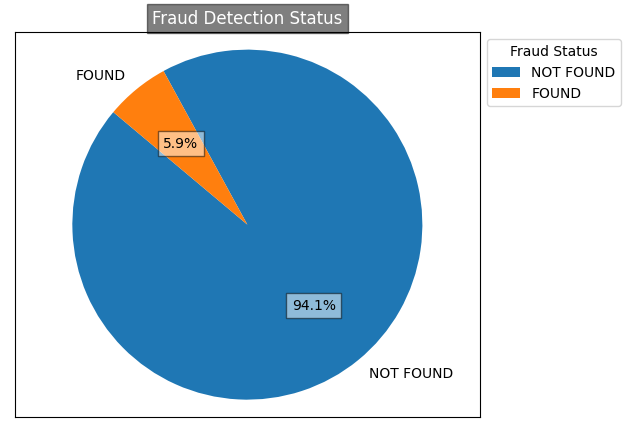

In [464]:
fraud_labels = ['NOT FOUND', 'FOUND']
fraud_counts = [df['FraudFound_P'].value_counts()[0], df['FraudFound_P'].value_counts()[1]]

fig, ax = plt.subplots(figsize=(6, 5))
patches, texts, autotexts = ax.pie(fraud_counts, labels=fraud_labels, autopct='%1.1f%%',
                                   startangle=140)

for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

ax.set_title("Fraud Detection Status", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Enclosing the legend
plt.legend(title='Fraud Status',bbox_to_anchor=(1, 1), loc="upper left")

plt.box(on=None)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


### Conclusion:

Around 95% of Insurance fraud goes undetected.

----------------------

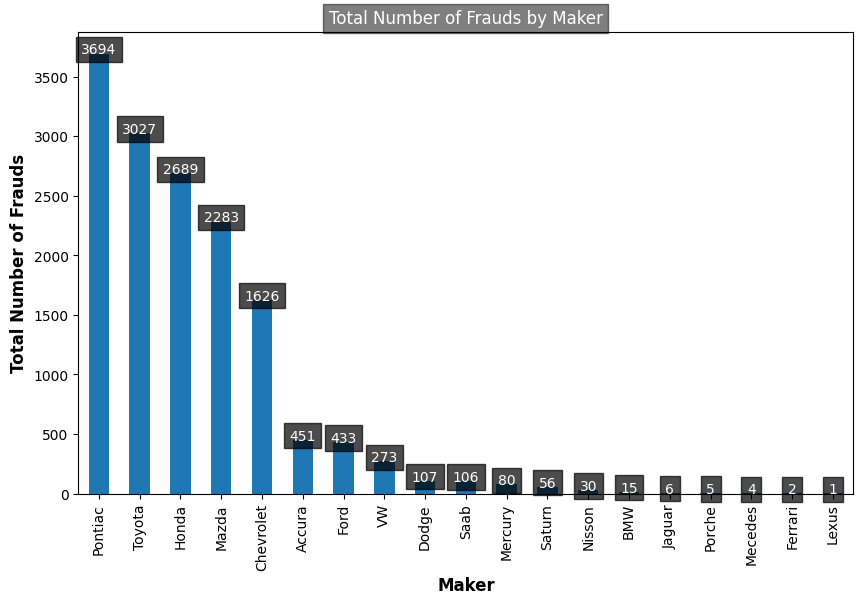

In [434]:
fraud_by_maker = df['Make'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))
fraud_by_maker.plot(kind='bar', ax=ax)

ax.set_title("Total Number of Frauds by Maker", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

ax.set_xlabel("Maker", color="black", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Number of Frauds", color="black", fontsize=12, fontweight='bold')

# Add data labels
for i, v in enumerate(fraud_by_maker):
    ax.text(i, v + 0.1, str(v), color='white', ha='center', bbox=dict(facecolor='black', alpha=0.7))

plt.box(on=True)

plt.show()


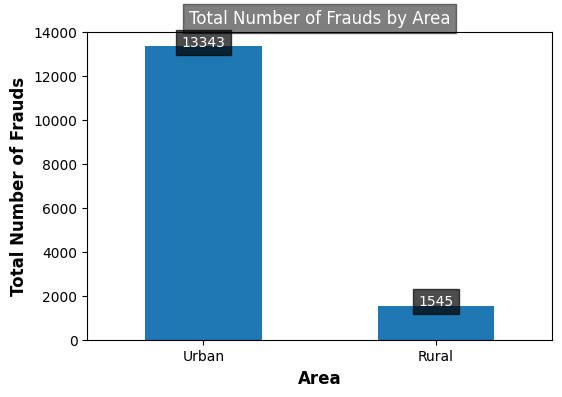

In [461]:
fraud_by_area = df['AccidentArea'].value_counts()

fig, ax = plt.subplots(figsize=(6, 4))
fraud_by_area.plot(kind='bar', ax=ax)

ax.set_title("Total Number of Frauds by Area", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

ax.set_xlabel("Area", color="black", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Number of Frauds", color="black", fontsize=12, fontweight='bold')

# Add data labels 
for i, v in enumerate(fraud_by_area):
    ax.text(i, v + 0.1, str(v), color='white', ha='center', bbox=dict(facecolor='black', alpha=0.7))

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.box(on=True)

plt.show()


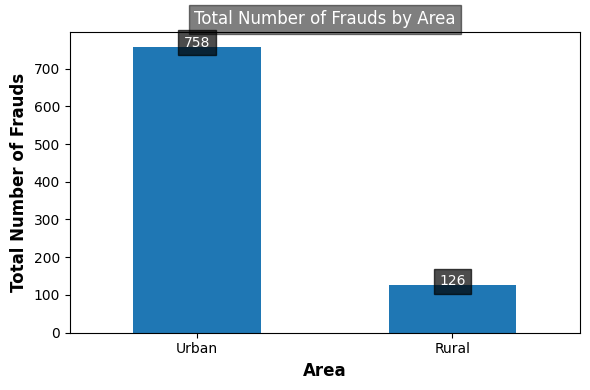

In [482]:
import matplotlib.pyplot as plt

# Filter the DataFrame for fraud committed (FraudFound_P = 1)
fraud_df = df[df['FraudFound_P'] == 1]

# Count the occurrences of each area where frauds are committed
fraud_area_counts = fraud_df['AccidentArea'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(6, 4))
fraud_area_counts.plot(kind='bar', ax=ax)

# Title and labels
ax.set_title('Total Number of Frauds by Area',color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

ax.set_xlabel('Area', color='black', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Number of Frauds', color='black', fontsize=12, fontweight='bold')

# Add data labels
for i, v in enumerate(fraud_area_counts):
    ax.text(i, v + 0.1, str(v), color='white', ha='center', bbox=dict(facecolor='black', alpha=0.7))

# Rotate x-axis labels
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


### Conclusion:

Our assumption was correct, Most frauds are in Urban areas

----------------------

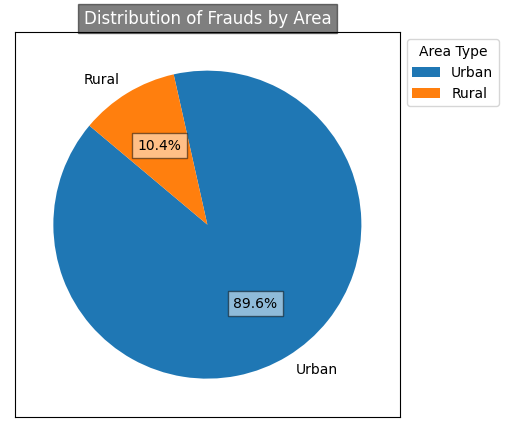

In [436]:
fraud_by_area = df['AccidentArea'].value_counts()

fig, ax = plt.subplots(figsize=(6, 5))
wedges, texts, autotexts = ax.pie(fraud_by_area, labels=fraud_by_area.index, autopct='%1.1f%%', startangle=140)

ax.set_title("Distribution of Frauds by Area",color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Add data labels
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
plt.legend(title='Area Type',bbox_to_anchor=(1, 1), loc="upper left")
plt.box(on=True)

plt.show()


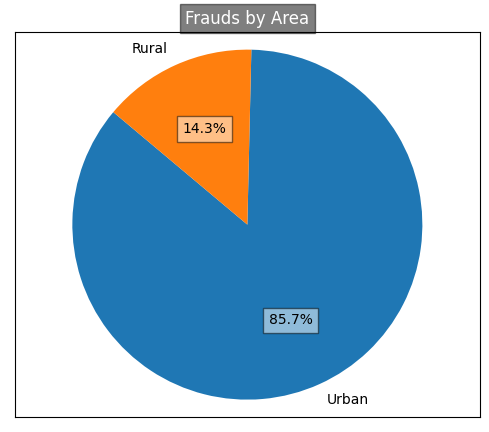

In [487]:
import matplotlib.pyplot as plt

# Calculate the number of frauds by area
fraud_by_area = df[df['FraudFound_P'] == 1]['AccidentArea'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
wedges, texts, autotexts = ax.pie(fraud_by_area, labels=fraud_by_area.index, autopct='%1.1f%%', startangle=140)

# Title with modern formatting
ax.set_title("Frauds by Area", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Add data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
    
plt.legend(title='Area Type',bbox_to_anchor=(1, 1), loc="upper left")

# Remove legend
plt.legend().remove()

# Enclosing the entire visual in a box
plt.box(on=None)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()


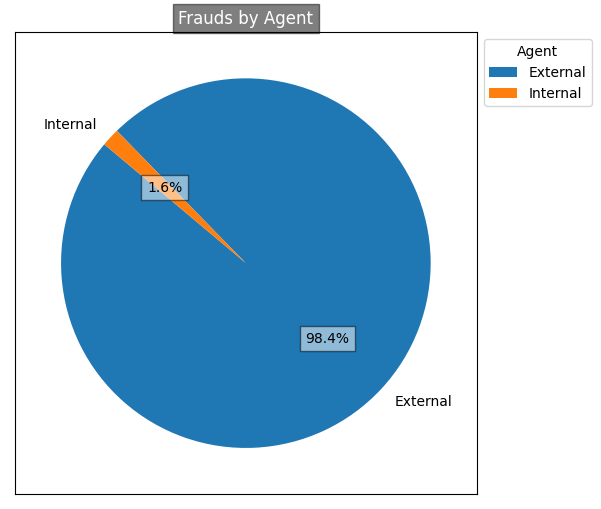

In [465]:
fraud_by_agent = df['AgentType'].value_counts()

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(fraud_by_agent, labels=fraud_by_agent.index, autopct='%1.1f%%', startangle=140)

ax.set_title("Frauds by Agent", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.legend(title='Agent',bbox_to_anchor=(1, 1), loc="upper left")
plt.box(on=True)

plt.show()


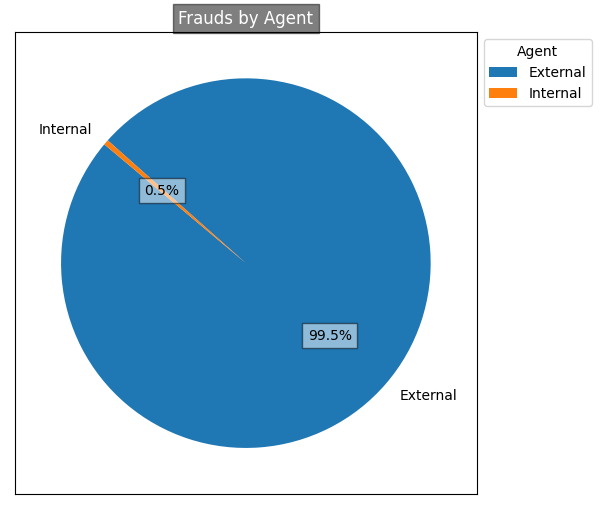

In [489]:
import matplotlib.pyplot as plt

# Calculate the count of frauds by agent type
fraud_by_agent = df[df['FraudFound_P'] == 1]['AgentType'].value_counts()

# Create the pie chart
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(fraud_by_agent, labels=fraud_by_agent.index, autopct='%1.1f%%', startangle=140)

# Set title with specified formatting
ax.set_title("Frauds by Agent", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Set data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Add legend with specified formatting
plt.legend(title='Agent', bbox_to_anchor=(1, 1), loc="upper left")

plt.box(on=True)

# Show the plot
plt.show()


### Conclusion:

Our assumption was correct, External Agents commit more fraud than Internal agents

----------------------

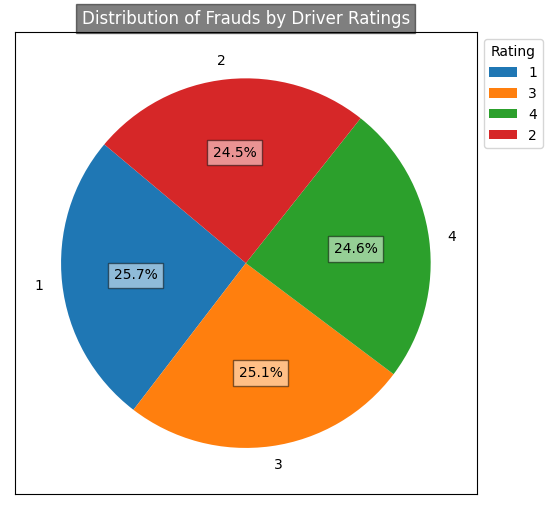

In [463]:
fraud_by_driver_rating = df['DriverRating'].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(fraud_by_driver_rating, labels=fraud_by_driver_rating.index, autopct='%1.1f%%', startangle=140)

ax.set_title("Distribution of Frauds by Driver Ratings", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Enclosing the legend
plt.legend(title='Rating',bbox_to_anchor=(1, 1), loc="upper left")
plt.box(on=True)

plt.show()


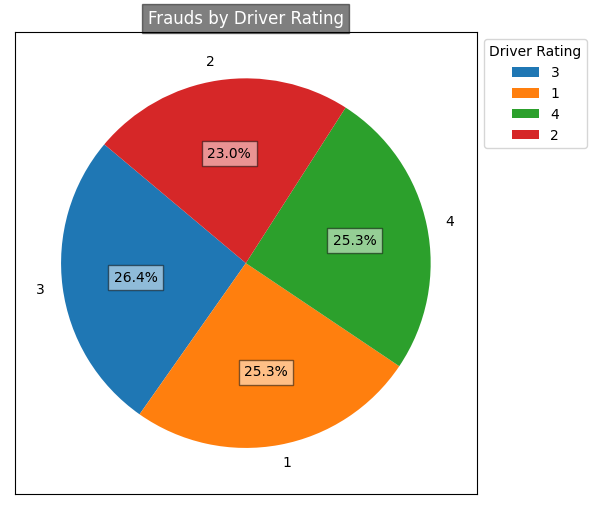

In [490]:
import matplotlib.pyplot as plt

# Calculate the count of frauds by driver rating where FraudFound_P is 1
fraud_by_driver_rating = df[df['FraudFound_P'] == 1]['DriverRating'].value_counts()

# Create the pie chart
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(fraud_by_driver_rating, labels=fraud_by_driver_rating.index, autopct='%1.1f%%', startangle=140)

# Set title with specified formatting
ax.set_title("Frauds by Driver Rating", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Set data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Add legend with specified formatting
plt.legend(title='Driver Rating', bbox_to_anchor=(1, 1), loc="upper left")

plt.box(on=True)

# Show the plot
plt.show()


### Conclusion:

our Hypothesis was wrong, there is no correlation between frauds and Driver rating

----------------------

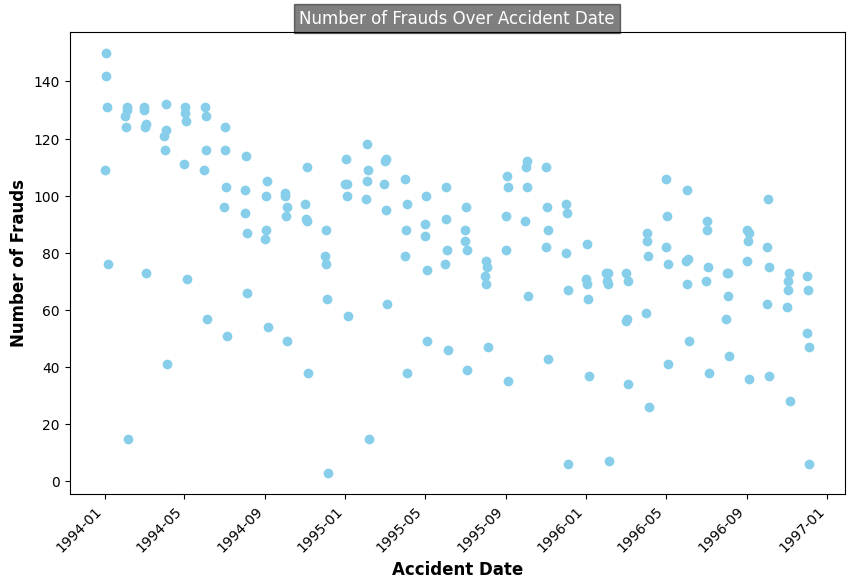

In [439]:

fraud_by_date = df['AccidentDate'].value_counts()

fraud_by_date = fraud_by_date.sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(fraud_by_date.index, fraud_by_date.values, color='skyblue')

plt.title("Number of Frauds Over Accident Date", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

plt.xticks(rotation=45, ha='right')
plt.xlabel('Accident Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds', fontsize=12, fontweight='bold')

plt.box(on=True)

plt.show()


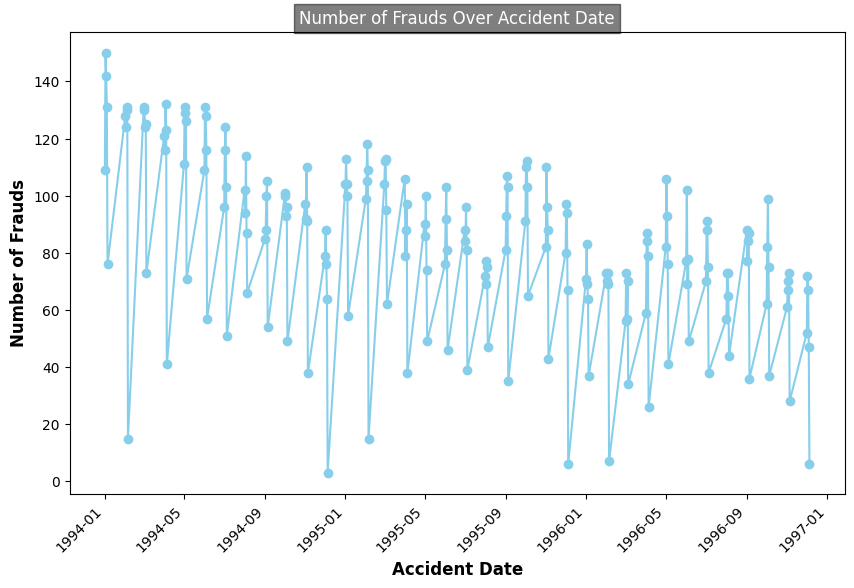

In [440]:
fraud_by_date = df['AccidentDate'].value_counts()

fraud_by_date = fraud_by_date.sort_index()

plt.figure(figsize=(10, 6))
plt.plot(fraud_by_date.index, fraud_by_date.values, marker='o', color='skyblue', linestyle='-')

plt.title("Number of Frauds Over Accident Date", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

plt.xticks(rotation=45, ha='right')
plt.xlabel('Accident Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds', fontsize=12, fontweight='bold')

plt.box(on=True)

plt.show()


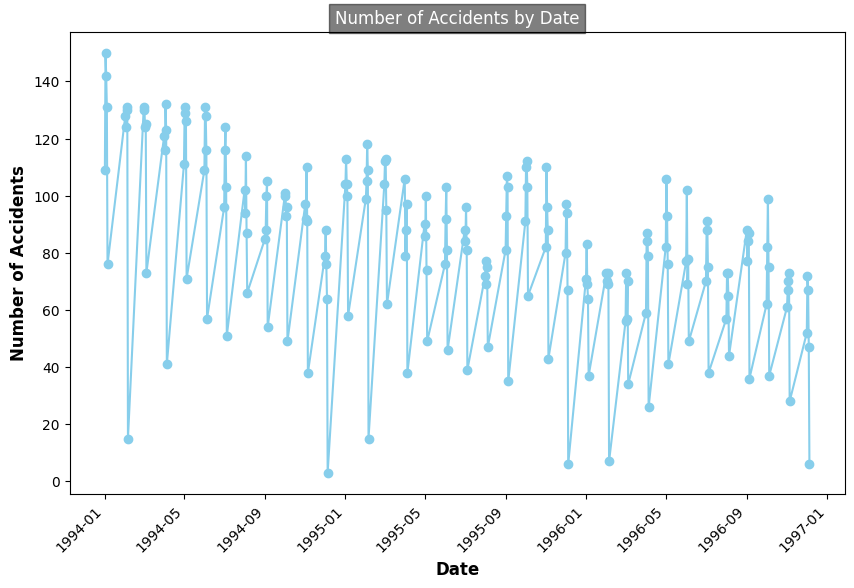

In [441]:
accidents_by_date = df.groupby('AccidentDate').size()

plt.figure(figsize=(10, 6))
plt.plot(accidents_by_date.index, accidents_by_date.values, marker='o', color='skyblue', linestyle='-')

plt.title("Number of Accidents by Date", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')

plt.box(on=True)

plt.show()


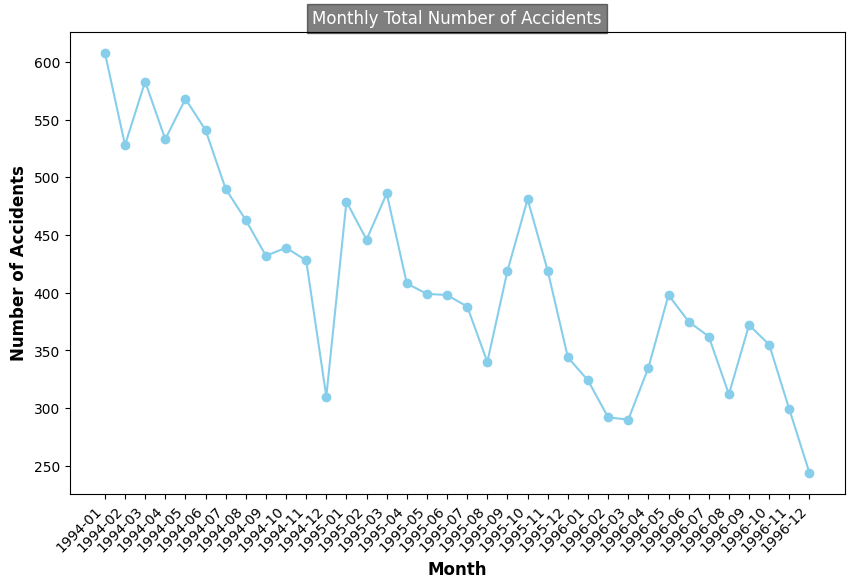

In [442]:
df['AccidentDate'] = pd.to_datetime(df['AccidentDate'])

df['YearMonth'] = df['AccidentDate'].dt.to_period('M')

monthly_accidents = df.groupby('YearMonth').size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_accidents.index.astype(str), monthly_accidents.values, marker='o', color='skyblue', linestyle='-')

plt.title("Monthly Total Number of Accidents", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')

plt.box(on=True)

plt.show()


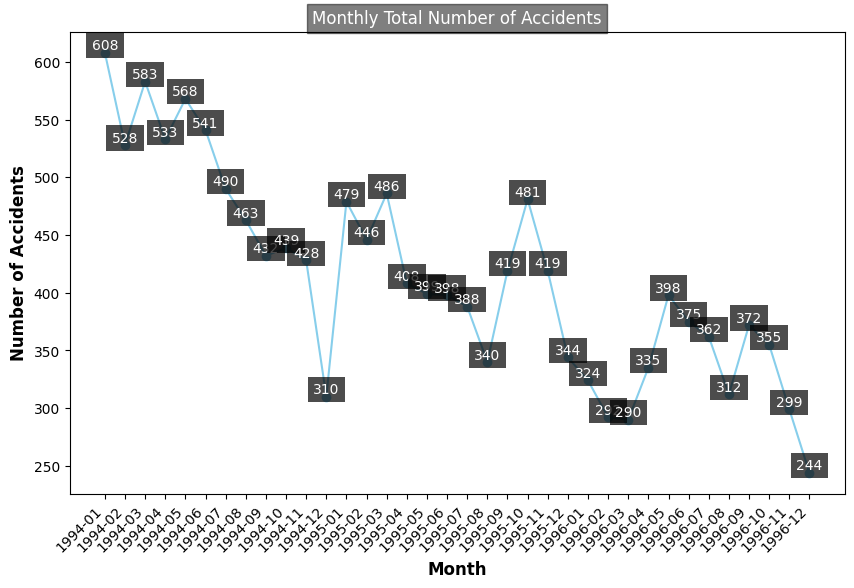

In [443]:
df['AccidentDate'] = pd.to_datetime(df['AccidentDate'])

df['YearMonth'] = df['AccidentDate'].dt.to_period('M')

monthly_accidents = df.groupby('YearMonth').size()

plt.figure(figsize=(10, 6))
plt.plot(monthly_accidents.index.astype(str), monthly_accidents.values, marker='o', color='skyblue', linestyle='-')

for i, txt in enumerate(monthly_accidents.values):
    plt.text(monthly_accidents.index.astype(str)[i], txt, str(txt), ha='center', va='bottom', 
             bbox=dict(facecolor='black', alpha=0.7, edgecolor='none'), color='white')

plt.title("Monthly Total Number of Accidents", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')

plt.box(on=True)

plt.show()


### Conclusion:

Like we hypothesised - Men are more fradualent then women

----------------------

### Conclusion:

Our hypothesis was wrong -
Married couples are more fradulent

----------------------

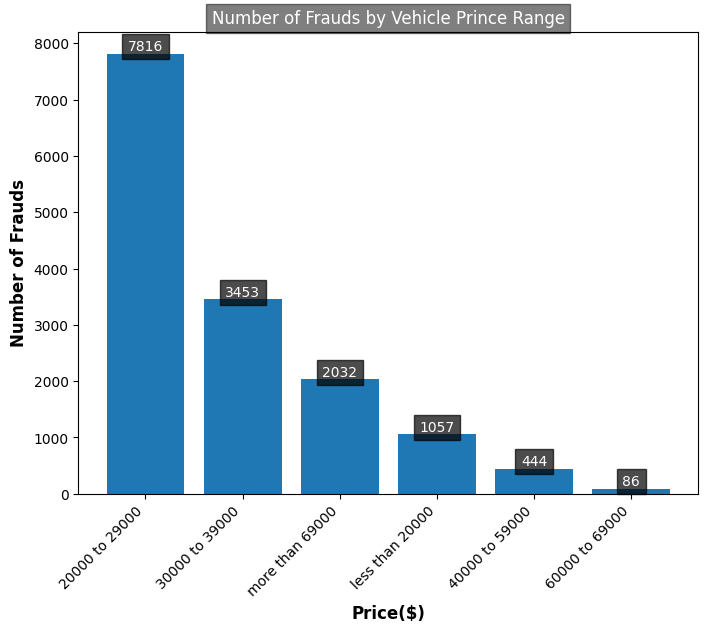

In [467]:

frauds_by_sex = df['VehiclePrice'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(frauds_by_sex.index, frauds_by_sex.values)

for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    plt.text(xval, yval, f'{round(yval)}', va='bottom', ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.7))

plt.title("Number of Frauds by Vehicle Prince Range", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
plt.xlabel('Price($)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')

plt.box(on=True)

plt.show()

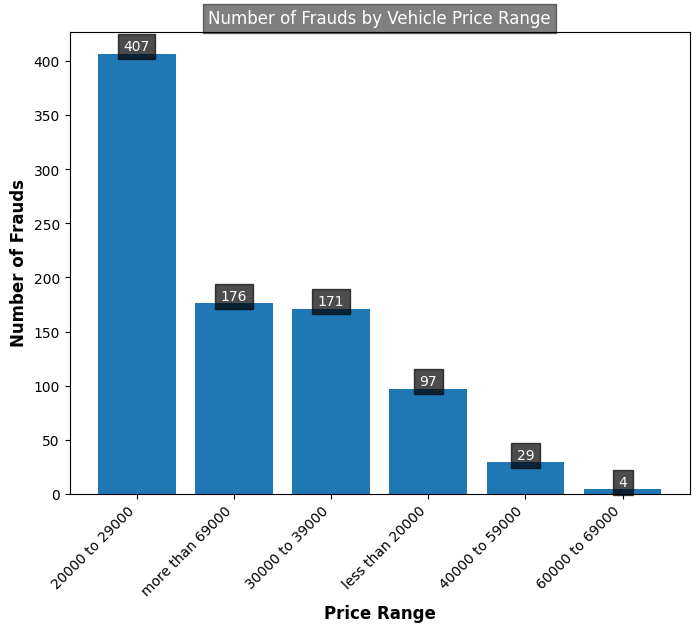

In [491]:
frauds_by_vehicle_price = df[df['FraudFound_P'] == 1]['VehiclePrice'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(frauds_by_vehicle_price.index, frauds_by_vehicle_price.values)

for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    plt.text(xval, yval, f'{round(yval)}', va='bottom', ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.7))

plt.title("Number of Frauds by Vehicle Price Range", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
plt.xlabel('Price Range', fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')

plt.box(on=True)

plt.show()


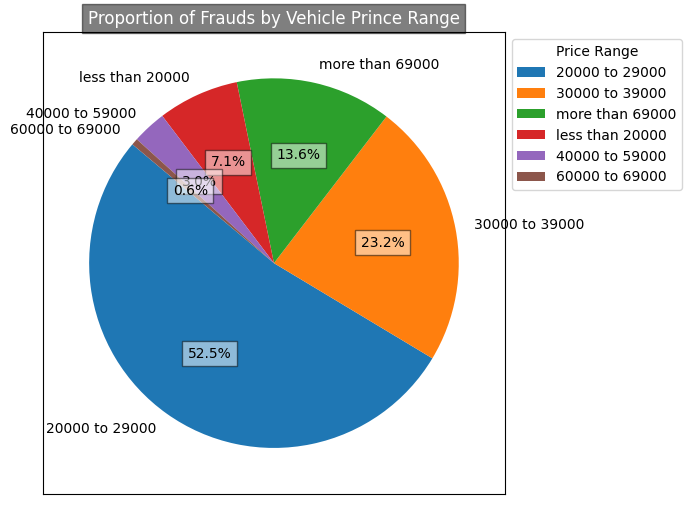

In [448]:

frauds_by_marital_status = df['VehiclePrice'].value_counts()

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(frauds_by_marital_status, labels=frauds_by_marital_status.index, autopct='%1.1f%%', startangle=140)

for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.title("Proportion of Frauds by Vehicle Prince Range", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

plt.legend(title='Price Range',bbox_to_anchor=(1, 1), loc="upper left")
plt.box(on=True)

plt.box(on=True)

plt.show()


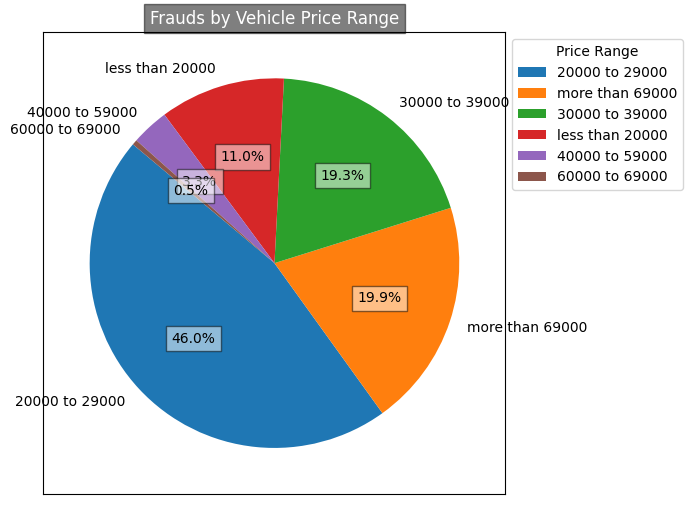

In [493]:
frauds_by_vehicle_price = df[df['FraudFound_P'] == 1]['VehiclePrice'].value_counts()

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(frauds_by_vehicle_price, labels=frauds_by_vehicle_price.index, autopct='%1.1f%%', startangle=140)

plt.title("Frauds by Vehicle Price Range", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Set data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
    
plt.legend(title='Price Range',bbox_to_anchor=(1, 1), loc="upper left")

plt.box(on=True)

# Show the plot
plt.show()


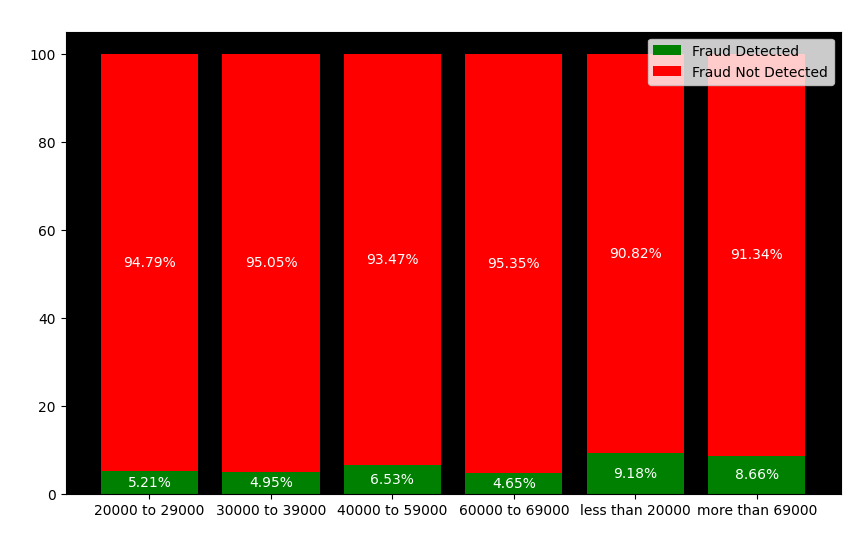

In [466]:
import matplotlib.pyplot as plt

# Calculate the total number of frauds for each price range
frauds_by_price_range = df.groupby('VehiclePrice')['FraudFound_P'].value_counts().unstack().fillna(0)

# Calculate the total number of frauds detected and not detected for each price range
frauds_detected = frauds_by_price_range[1]
frauds_not_detected = frauds_by_price_range[0]

# Calculate the total number of frauds for each price range
total_frauds = frauds_detected + frauds_not_detected

# Calculate the percentage of frauds detected and not detected for each price range
percentage_detected = (frauds_detected / total_frauds) * 100
percentage_not_detected = (frauds_not_detected / total_frauds) * 100

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(frauds_by_price_range.index, percentage_detected, label='Fraud Detected', color='green')
plt.bar(frauds_by_price_range.index, percentage_not_detected, bottom=percentage_detected, label='Fraud Not Detected', color='red')

# Add data labels
for i, (detected, not_detected) in enumerate(zip(percentage_detected, percentage_not_detected)):
    plt.text(i, detected / 2, f'{round(detected, 2)}%', ha='center', va='center', color='white')
    plt.text(i, detected + (not_detected / 2), f'{round(not_detected, 2)}%', ha='center', va='center', color='white')

# Title and labels
plt.title('Percentage of Fraud Detected by Vehicle Price Range', color='white')
plt.xlabel('Vehicle Price Range', color='white')
plt.ylabel('Percentage of Fraud', color='white')

# Add legend
plt.legend()

# Set background color
plt.gca().set_facecolor('black')

# Show plot
plt.show()


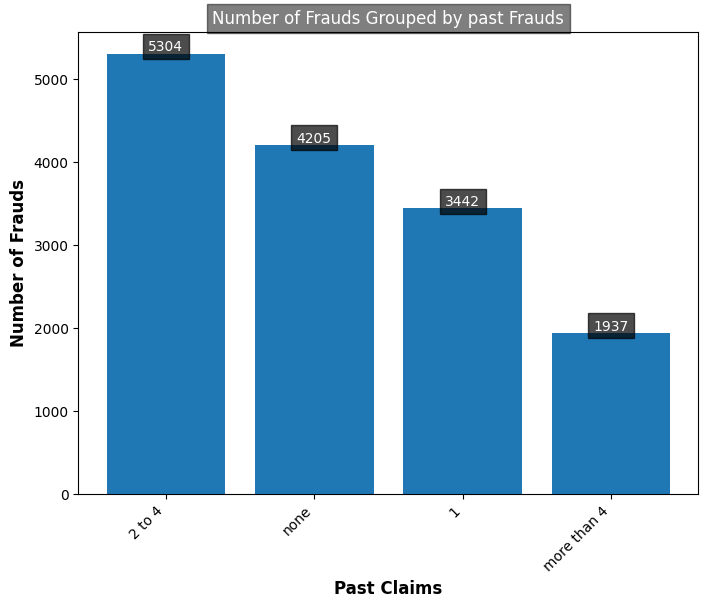

In [449]:

frauds_by_sex = df['PastNumberOfClaims'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(frauds_by_sex.index, frauds_by_sex.values)

for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    plt.text(xval, yval, f'{round(yval)}', va='bottom', ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.7))

plt.title("Number of Frauds Grouped by past Frauds", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
plt.xlabel('Past Claims', fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')

plt.box(on=True)

plt.show()

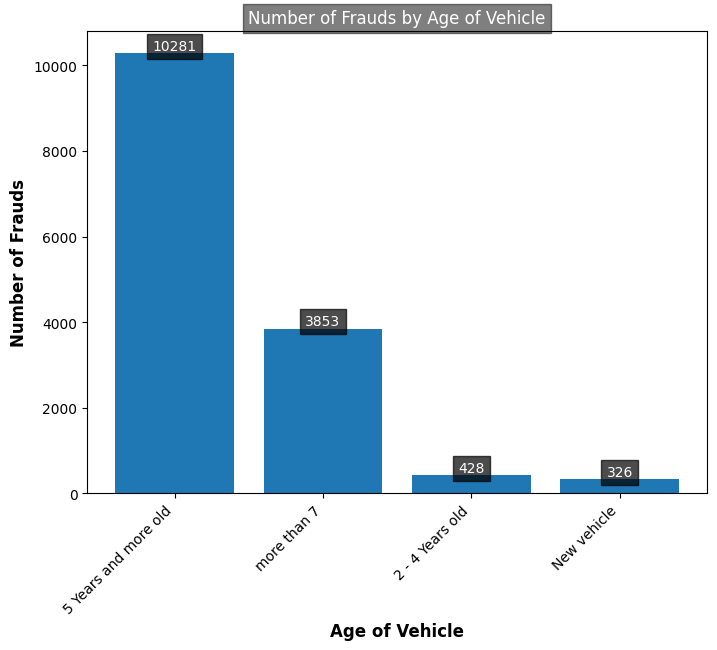

In [469]:

frauds_by_sex = df['AgeOfVehicle'].value_counts()


plt.figure(figsize=(8, 6))
bars = plt.bar(frauds_by_sex.index, frauds_by_sex.values)

for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    plt.text(xval, yval, f'{round(yval)}', va='bottom', ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.7))


plt.title("Number of Frauds by Age of Vehicle", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
plt.xlabel('Age of Vehicle', fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds', fontsize=12, fontweight='bold')


plt.xticks(rotation=45, ha='right')


plt.box(on=True)

plt.show()

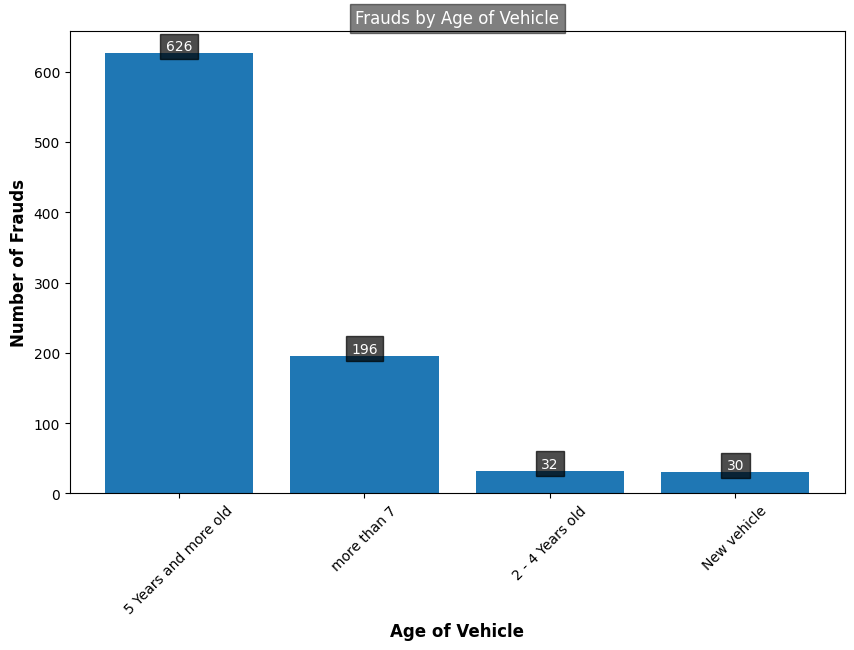

In [496]:
# Filter the dataframe for frauds where FraudFound_P = 1
frauds = df[df['FraudFound_P'] == 1]

# Calculate the count of frauds by age of vehicle
frauds_by_age_of_vehicle = frauds['AgeOfVehicle'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(frauds_by_age_of_vehicle.index, frauds_by_age_of_vehicle.values)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    plt.text(xval, yval, f'{round(yval)}', va='bottom', ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.7))

# Adding title and labels with specified formatting
plt.title("Frauds by Age of Vehicle", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
plt.xlabel("Age of Vehicle", color="black", fontsize=12, fontweight='bold')
plt.ylabel("Number of Frauds", color="black", fontsize=12, fontweight='bold')

# Rotating x-axis labels
plt.xticks(rotation=45)

plt.box(on=True)

# Show the plot
plt.show()


### Conclusion:

Our hypothesis was Correct -
older the vehicle - more the claim

----------------------

In [451]:
frauds_by_sex = df['AgeOfVehicle'].value_counts()

frauds_by_sex_df = pd.DataFrame({'Sex': frauds_by_sex.index, 'Number of Frauds': frauds_by_sex.values})

display(frauds_by_sex_df)


,Sex,Number of Frauds
0,7 years,5615
1,more than 7,3853
2,6 years,3367
3,5 years,1299
4,new,326
5,4 years,214
6,3 years,142
7,2 years,72


In [452]:
df['AgeOfVehicle'] = df['AgeOfVehicle'].replace({
    '5 years': '5 Years and more old',
    '6 years': '5 Years and more old',
    '7 years': '5 Years and more old',
    '4 years': '2 - 4 Years old',
    '3 years': '2 - 4 Years old',
    '2 years': '2 - 4 Years old',
    'new': 'New vehicle'
})

frauds_by_age = df['AgeOfVehicle'].value_counts()

frauds_by_age.reset_index().rename(columns={'index': 'Age of Vehicle', 'AgeOfVehicle': 'Number of Frauds'})


,Age of Vehicle,Number of Frauds
0,5 Years and more old,10281
1,more than 7,3853
2,2 - 4 Years old,428
3,New vehicle,326


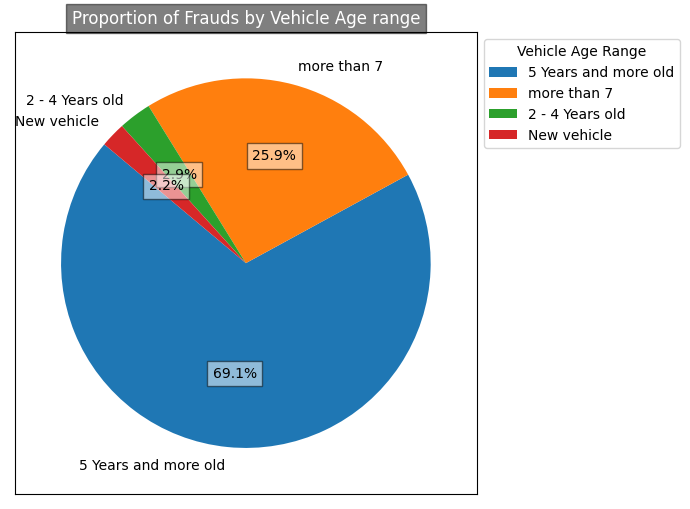

In [453]:
df['AgeOfVehicle'] = df['AgeOfVehicle'].replace({
    '5 years': '5 Years and more old',
    '6 years': '5 Years and more old',
    '7 years': '5 Years and more old',
    '4 years': '2 - 4 Years old',
    '3 years': '2 - 4 Years old',
    '2 years': '2 - 4 Years old',
    'new': 'New vehicle'
})
frauds_by_marital_status = df['AgeOfVehicle'].value_counts()
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(frauds_by_marital_status, labels=frauds_by_marital_status.index, autopct='%1.1f%%', startangle=140)
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))
plt.title("Proportion of Frauds by Vehicle Age range", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
plt.legend(title='Vehicle Age Range',bbox_to_anchor=(1, 1), loc="upper left")
plt.box(on=True)
plt.box(on=True)

plt.show()


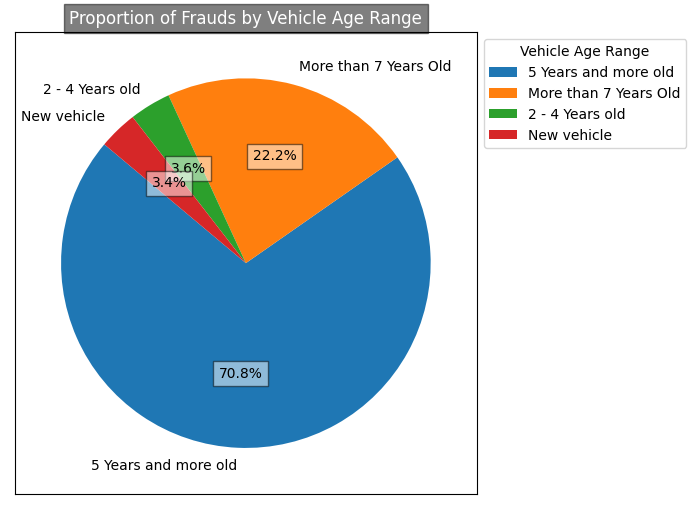

In [511]:
# Replace values in 'AgeOfVehicle' column to categorize into groups
df['AgeOfVehicle'] = df['AgeOfVehicle'].replace({
    '5 years': '5 - 7 Years Old',
    '6 years': '5 - 7 Years Old',
    '7 years': '5 - 7 Years Old',
    'more than 7': 'More than 7 Years Old',
    '4 years': '2 - 4 Years Old',
    '3 years': '2 - 4 Years Old',
    '2 years': '2 - 4 Years Old',
    'new': 'New Vehicle'
})

# Calculate the count of frauds by age group
frauds_by_age_group = df[df['FraudFound_P'] == 1]['AgeOfVehicle'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(frauds_by_age_group, labels=frauds_by_age_group.index, autopct='%1.1f%%', startangle=140)

# Add data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Add title with specified formatting
plt.title("Proportion of Frauds by Vehicle Age Range", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Add legend with specified formatting
plt.legend(title='Vehicle Age Range', bbox_to_anchor=(1, 1), loc="upper left")

# Show the plot
plt.box(on=True)
plt.show()


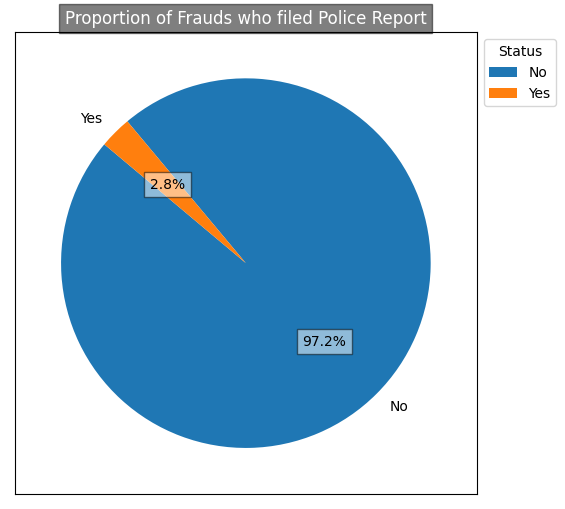

In [455]:

frauds_by_marital_status = df['PoliceReportFiled'].value_counts()

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(frauds_by_marital_status, labels=frauds_by_marital_status.index, autopct='%1.1f%%', startangle=140)

for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.title("Proportion of Frauds who filed Police Report", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

plt.legend(title='Status',bbox_to_anchor=(1, 1), loc="upper left")
plt.box(on=True)

plt.box(on=True)

plt.show()


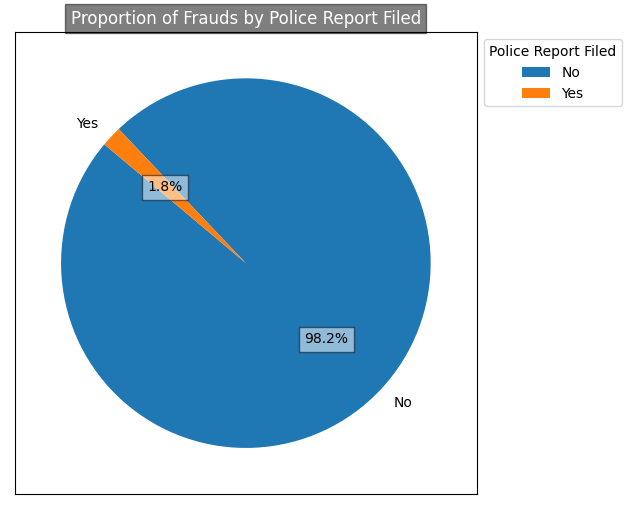

In [498]:
# Calculate the count of frauds by police report filed
frauds_by_police_report = df[df['FraudFound_P'] == 1]['PoliceReportFiled'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(frauds_by_police_report, labels=frauds_by_police_report.index, autopct='%1.1f%%', startangle=140)

# Add data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Add title with specified formatting
plt.title("Proportion of Frauds by Police Report Filed", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Add legend with specified formatting
plt.legend(title='Police Report Filed', bbox_to_anchor=(1, 1), loc="upper left")

# Show the plot
plt.box(on=True)
plt.show()


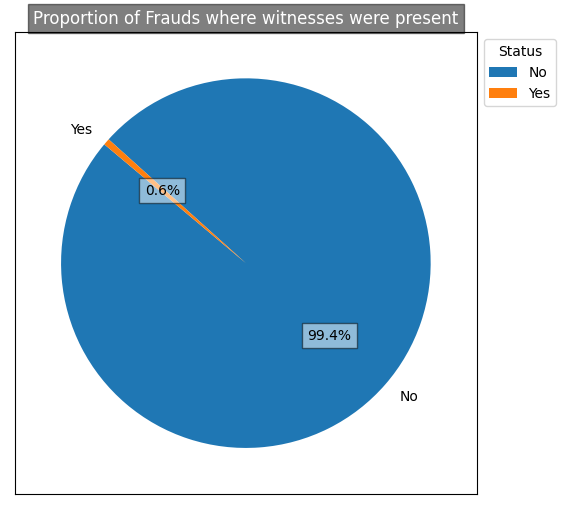

In [456]:
frauds_by_marital_status = df['WitnessPresent'].value_counts()

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(frauds_by_marital_status, labels=frauds_by_marital_status.index, autopct='%1.1f%%', startangle=140)

for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.title("Proportion of Frauds where witnesses were present", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

plt.legend(title='Status',bbox_to_anchor=(1, 1), loc="upper left")
plt.box(on=True)

plt.box(on=True)

plt.show()


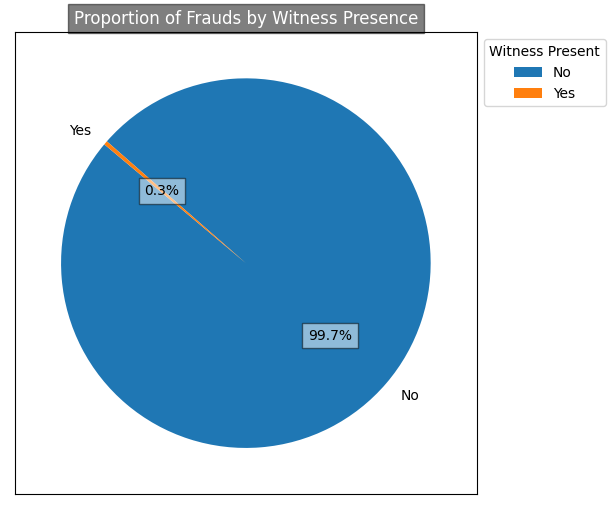

In [499]:
# Calculate the count of frauds by witnesses present
frauds_by_witness = df[df['FraudFound_P'] == 1]['WitnessPresent'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(frauds_by_witness, labels=frauds_by_witness.index, autopct='%1.1f%%', startangle=140)

# Add data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Add title with specified formatting
plt.title("Proportion of Frauds by Witness Presence", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Add legend with specified formatting
plt.legend(title='Witness Present', bbox_to_anchor=(1, 1), loc="upper left")

# Show the plot
plt.box(on=True)
plt.show()


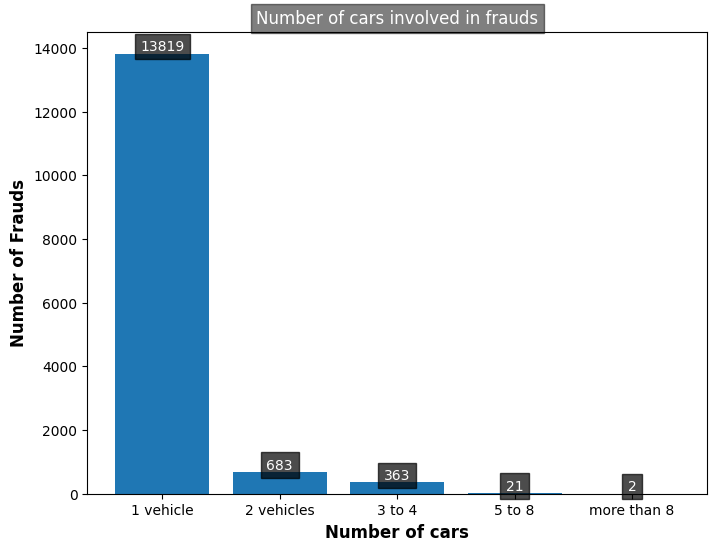

In [470]:

frauds_by_sex = df['NumberOfCars'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(frauds_by_sex.index, frauds_by_sex.values)

for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    plt.text(xval, yval, f'{round(yval)}', va='bottom', ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.7))

plt.title("Number of cars involved in frauds", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
plt.xlabel('Number of cars', fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds', fontsize=12, fontweight='bold')

plt.box(on=True)

plt.show()

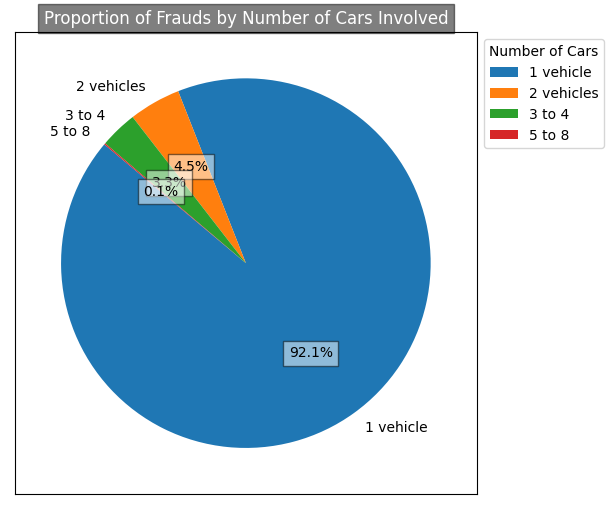

In [500]:
# Calculate the count of frauds by the number of cars involved
frauds_by_cars = df[df['FraudFound_P'] == 1]['NumberOfCars'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(frauds_by_cars, labels=frauds_by_cars.index, autopct='%1.1f%%', startangle=140)

# Add data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Add title with specified formatting
plt.title("Proportion of Frauds by Number of Cars Involved", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Add legend with specified formatting
plt.legend(title='Number of Cars', bbox_to_anchor=(1, 1), loc="upper left")

# Show the plot
plt.box(on=True)
plt.show()


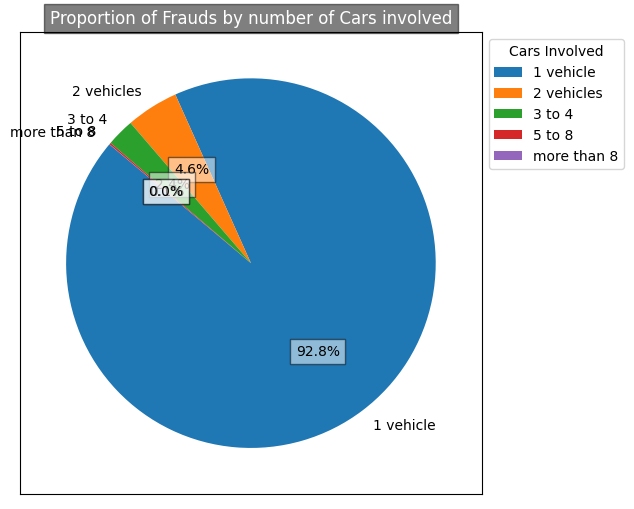

In [14]:

frauds_by_marital_status = df['NumberOfCars'].value_counts()

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(frauds_by_marital_status, labels=frauds_by_marital_status.index, autopct='%1.1f%%', startangle=140)

for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

plt.title("Proportion of Frauds by number of Cars involved", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

plt.legend(title='Cars Involved',bbox_to_anchor=(1, 1), loc="upper left")
plt.box(on=True)


plt.show()


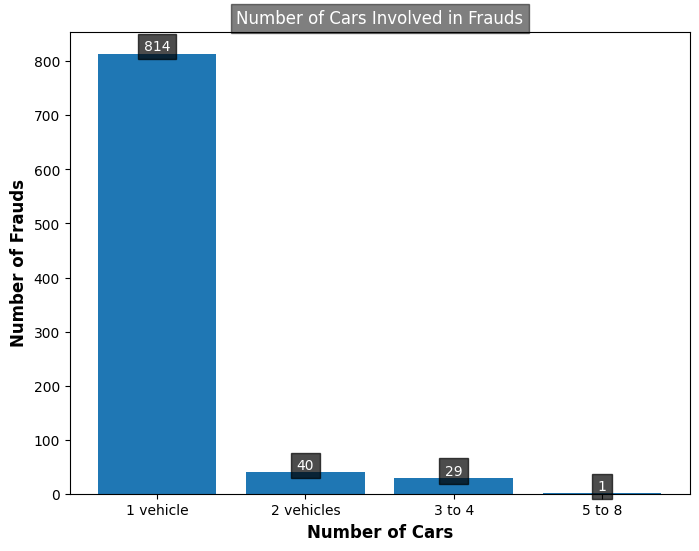

In [505]:
# Calculate the count of frauds by number of cars involved
frauds_by_cars = df[df['FraudFound_P'] == 1]['NumberOfCars'].value_counts()

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(frauds_by_cars.index, frauds_by_cars.values)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    plt.text(xval, yval, f'{round(yval)}', va='bottom', ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.7))

# Set title with specified formatting
plt.title("Number of Cars Involved in Frauds",  color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Set labels for x and y axes with specified formatting
plt.xlabel('Number of Cars', color="Black", fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds', color="Black", fontsize=12, fontweight='bold')

# Show plot with box enabled
plt.box(on=True)

# Show the plot
plt.show()


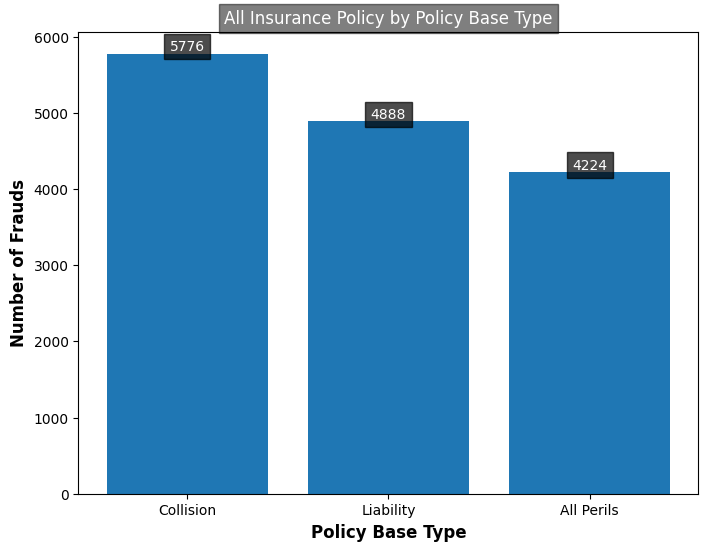

In [8]:
import matplotlib.pyplot as plt

frauds_by_sex = df['BasePolicy'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(frauds_by_sex.index, frauds_by_sex.values)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    plt.text(xval, yval, f'{round(yval)}', va='bottom', ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.7))

plt.title("All Insurance Policy by Policy Base Type", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
plt.xlabel('Policy Base Type', fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds', fontsize=12, fontweight='bold')

plt.box(on=True)

plt.show()

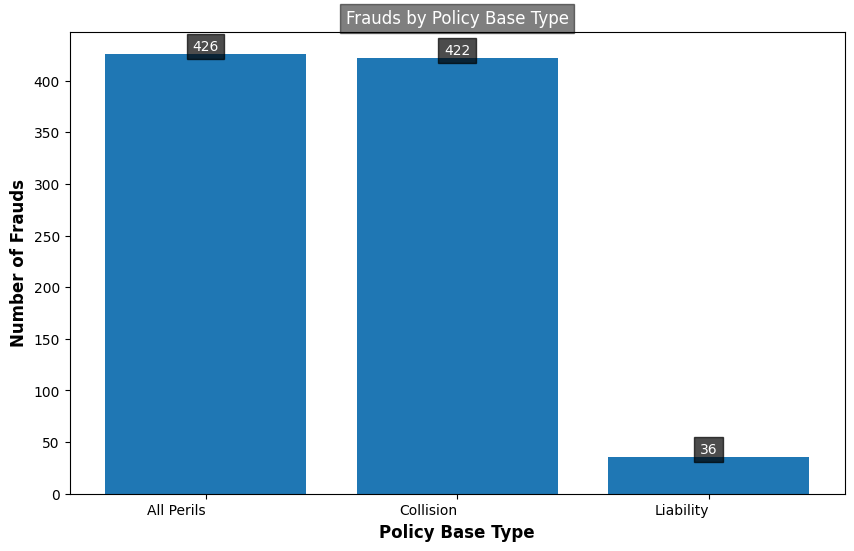

In [509]:
# Calculate the count of frauds by policy base type
frauds_by_policy_base = df[df['FraudFound_P'] == 1]['BasePolicy'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(frauds_by_policy_base.index, frauds_by_policy_base.values)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    xval = bar.get_x() + bar.get_width() / 2
    plt.text(xval, yval, f'{round(yval)}', va='bottom', ha='center', color='white',
             bbox=dict(facecolor='black', alpha=0.7))

# Set title with specified formatting
plt.title("Frauds by Policy Base Type", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})
# Set labels for x and y axes with specified formatting
plt.xlabel('Policy Base Type', color="black", fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds', color="black", fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Show plot with box enabled
plt.box(on=True)

# Show the plot
plt.show()


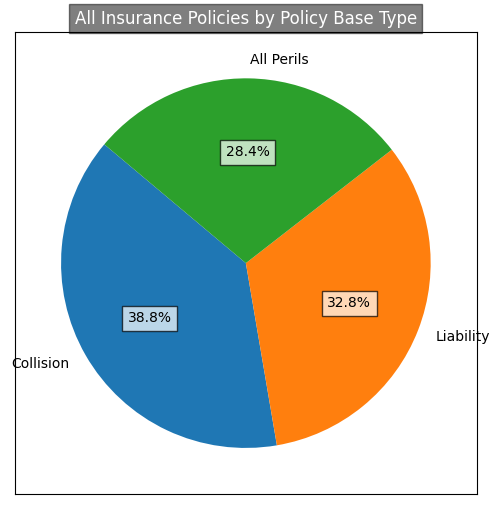

In [19]:
import matplotlib.pyplot as plt

# Calculate the count of all insurance policies by policy base type
all_policies_by_base = df['BasePolicy'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(all_policies_by_base, labels=all_policies_by_base.index, autopct='%1.1f%%', startangle=140)

# Set title with specified formatting
plt.title("All Insurance Policies by Policy Base Type", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Add data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='White', alpha=0.7))
    

# Show the plot
plt.box(on=True)

# Show the plot
plt.show()


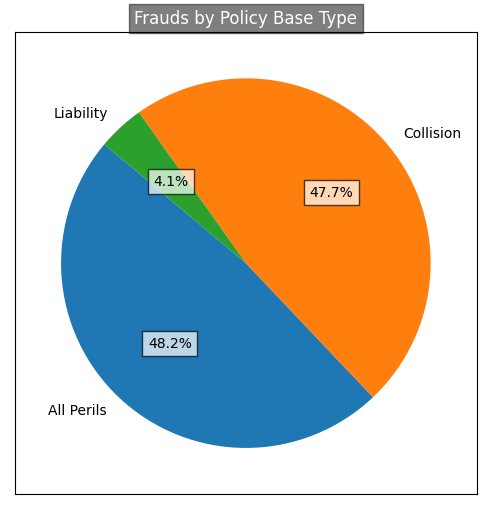

In [18]:
import matplotlib.pyplot as plt

# Calculate the count of frauds by policy base type
frauds_by_policy_base = df[df['FraudFound_P'] == 1]['BasePolicy'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(frauds_by_policy_base, labels=frauds_by_policy_base.index, autopct='%1.1f%%', startangle=140)

# Set title with specified formatting
plt.title("Frauds by Policy Base Type", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Add data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.7))

    # Show the plot
plt.box(on=True)

# Show the plot
plt.show()


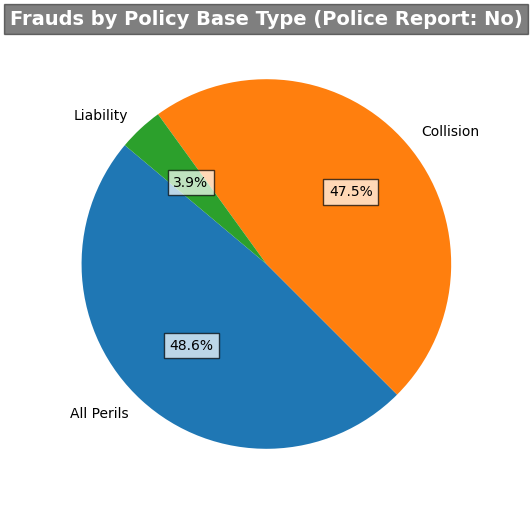

In [26]:
import matplotlib.pyplot as plt

# Filter the dataframe for FraudFound_P = 1 and PoliceReportFiled = 'No'
filtered_df = df[(df['FraudFound_P'] == 1) & (df['PoliceReportFiled'] == 'No')]

# Calculate the count of frauds by policy base type in the filtered dataframe
frauds_by_policy_base = filtered_df['BasePolicy'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(frauds_by_policy_base, labels=frauds_by_policy_base.index, autopct='%1.1f%%', startangle=140)

# Set title with specified formatting
plt.title("Frauds by Policy Base Type (Police Report: No)", color="white", fontsize=14, fontweight='bold', bbox={'facecolor': 'black', 'alpha': 0.5})

# Add data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.7))

# Show the plot
plt.show()


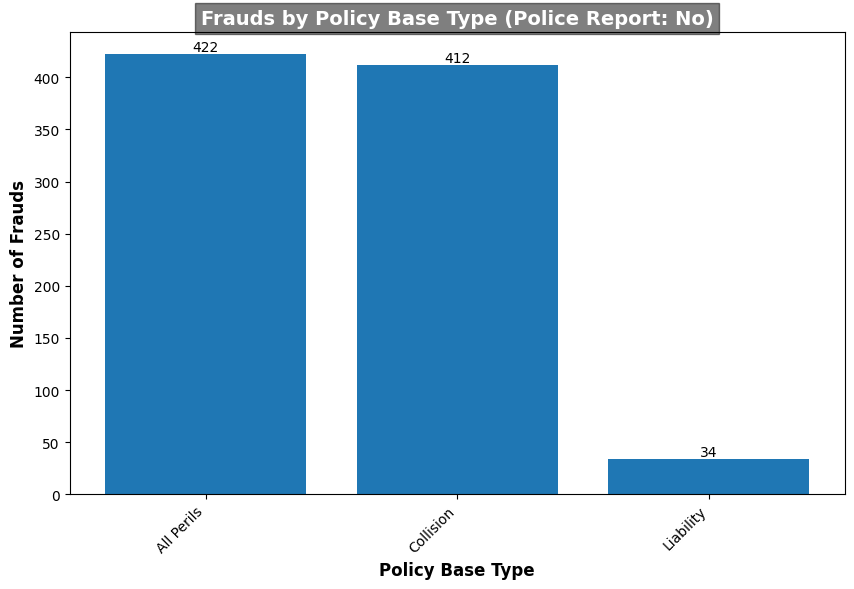

In [25]:
import matplotlib.pyplot as plt

# Filter the dataframe for FraudFound_P = 1 and PoliceReportFiled = 'No'
filtered_df = df[(df['FraudFound_P'] == 1) & (df['PoliceReportFiled'] == 'No')]

# Calculate the count of frauds by policy base type in the filtered dataframe
frauds_by_policy_base = filtered_df['BasePolicy'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(frauds_by_policy_base.index, frauds_by_policy_base.values)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black')

# Set title with specified formatting
plt.title("Frauds by Policy Base Type (Police Report: No)", color="white", fontsize=14, fontweight='bold', bbox={'facecolor': 'black', 'alpha': 0.5})

# Set labels for x and y axes with specified formatting
plt.xlabel('Policy Base Type', color="black", fontsize=12, fontweight='bold')
plt.ylabel('Number of Frauds', color="black", fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot with box enabled
plt.box(on=True)

# Show the plot
plt.show()


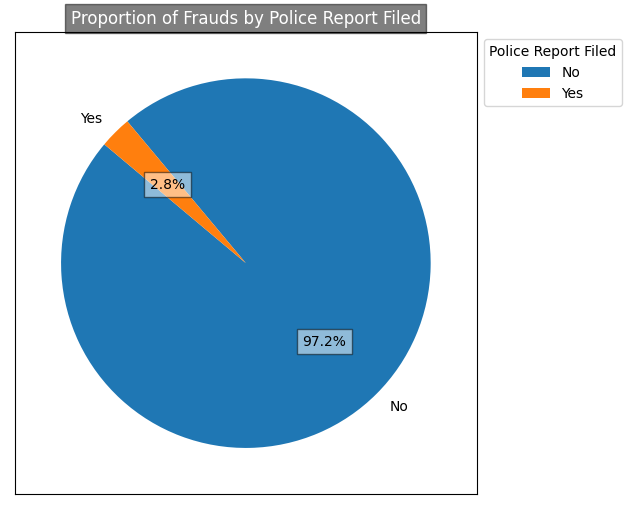

In [27]:
# Calculate the count of frauds by police report filed
frauds_by_police_report = df['PoliceReportFiled'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(frauds_by_police_report, labels=frauds_by_police_report.index, autopct='%1.1f%%', startangle=140)

# Add data labels with a dark box
for autotext in autotexts:
    autotext.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Add title with specified formatting
plt.title("Proportion of Frauds by Police Report Filed", color="white", bbox={'facecolor': 'black', 'alpha': 0.5})

# Add legend with specified formatting
plt.legend(title='Police Report Filed', bbox_to_anchor=(1, 1), loc="upper left")

# Show the plot
plt.box(on=True)
plt.show()